<a href="https://colab.research.google.com/github/dikoharyadhanto/Machine-Learning-Documentation/blob/main/002-Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eksplorasi Data: Memahami Data dengan Statistik**

- Memasukkan file csv dengan menggunakan library pandas.
- Mengecek berapa jumlah baris dan kolom dari dataset dengan fungsi `.shape`
- Menampilkan dataset hanya 5 baris teratas dengan menggunakan fungsi `.head()`
- Mengecek apakah ada data yang kosong atau tidak dan menampilkan daftar nama kolom serta tipe data yang digunakan. Fungsi yang digunakan adalah `.info()`
- Menampilkan hasil perhitungan statistik deskriptif secara singkat dalam bentuk tabel dengan memanggil fungsi `.describe()`

In [1]:
## EXPLORING DATA

import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                     -1.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      0.0  ...     True    False

[5 rows x 18 columns]

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Durati

kita juga perlu sedikit menggali tentang hubungan atau korelasi dari setiap feature, karena beberapa algorithm seperti linear regression dan logistic regression akan menghasilkan model dengan performansi yang buruk jika kita menggunakan feature/variabel saling dependensi atau berkorelasi kuat (multicollinearity).

Jadi, jika kita sudah tahu bahwa data kita berkorelasi kuat, kita bisa menggunakan algorithm lain yang tidak sensitif terhadap hubungan korelasi dari feature/variabel seperti decision tree.

In [2]:
## MEMBUAT KORELASI DATA

dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

Korelasi dataset:
                          Administrative  ...   Revenue
Administrative                 1.000000  ...  0.138631
Administrative_Duration        0.601466  ...  0.093395
Informational                  0.376782  ...  0.095085
Informational_Duration         0.255757  ...  0.070250
ProductRelated                 0.430832  ...  0.158280
ProductRelated_Duration        0.373647  ...  0.152130
BounceRates                   -0.223474  ... -0.150621
ExitRates                     -0.316192  ... -0.206886
PageValues                     0.098771  ...  0.492569
SpecialDay                    -0.095054  ... -0.082305
OperatingSystems              -0.006459  ... -0.014668
Browser                       -0.025243  ...  0.023984
Region                        -0.005680  ... -0.011595
TrafficType                   -0.033748  ... -0.005113
Weekend                        0.026404  ...  0.029295
Revenue                        0.138631  ...  1.000000

[16 rows x 16 columns]
Distribusi Label (Reve

# **Eksplorasi Data: Memahami Data dengan Visual**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


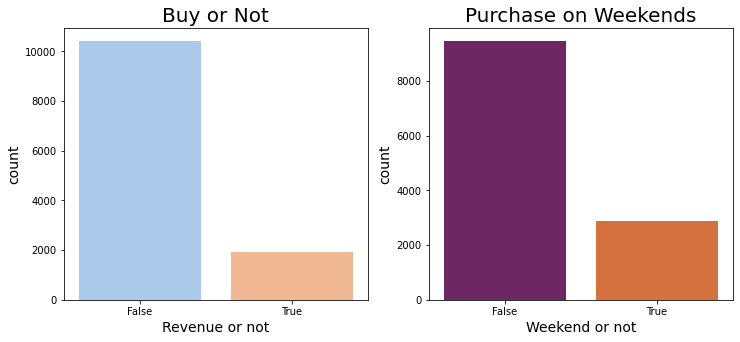

In [3]:
## EXPLORE DATA PAKE GRAFIK

import matplotlib.pyplot as plt
import seaborn as sns
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

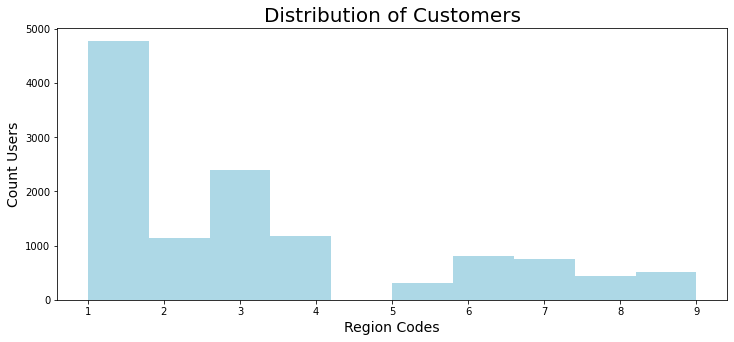

In [4]:
import matplotlib.pyplot as plt
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

# **Data Pre-processing: Handling Missing Value**

## **Menghitung Jumlah Missing Value**

Untuk menghitung berapa jumlah missing value dalam dataset, dapat menggunakan fungsi `.isna()` ditambahkan dengan `.sum()`. Untuk mengetahui total keseluruhannya, ditambahkan lagi `.sum()`.

In [5]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isna().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isna().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


## **Menghapus Missing Value**

Terdapat beberapa metode yang dapat kita lakukan untuk menangani missing value. Salah satunya dengan menghapus missing value. Namun, kita tidak bisa begitu saja melakukannya. Kita juga perlu menganalisis penyebaran missing value, dan berapa persen jumlah missing value dalam data kita,

Metode penghapusan missing values dapat diterapkan jika tidak banyak missing value dalam data, sehingga walaupun data point ini dihapus, kita masih memiliki sejumlah data yang cukup untuk melatih model Machine Learning.

Tetapi jika kita memiliki banyak missing value dan tersebar di setiap variabel, maka metode menghapus missing value tidak dapat digunakan. Kita akan kehilangan sejumlah data yang tentunya mempengaruhi performansi model.

Kita bisa menggunakan fungsi `.dropna( )` dari pandas library untuk menghapus missing values.

In [6]:
#Drop rows with missing value   
dataset_clean = dataset.dropna() 
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


## **Mengisi Missing Value dengan Nilai Statistik**

Selain dengan menghapus missing value, Kita bisa menggunakan metode impute missing value, yaitu mengisi record yang hilang ini dengan suatu nilai. 

Terdapat berbagai teknik dalam metode imputing, mulai dari yang paling sederhana yaitu mengisi missing value dengan nilai mean, median, modus, atau nilai konstan, sampai teknik paling advance yaitu dengan menggunakan nilai yang diestimasi oleh suatu predictive model.

Imputing missing dapat dilakukan dengan memasukkan fungsi `.fillna()` dan `.mean()` dari Pandas

In [7]:
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

**Contoh lain dengan Median:**

In [8]:
import pandas as pd
dataset1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

# **Data Preprocessing: Scaling**

Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias.

Sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling, sehingga semua feature berada dalam rentang nilai tersebut.
Untuk melakukan data rescaling, dapat menggunakan fungsi `.MinMaxScaler()` dari Scikit-Learn library.

**Rumus rescaling:**

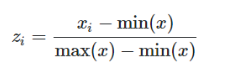

- Asumsi dalam proses scaling adalah semua data harus merupakan data numerik
- Error akan terjadi jika proses scalling dijalankan pada data-data non-numerik
- Kita perlu terlebih dahulu menyeleksi feature - feature dari dataset yang bertipe numerik.

Langkah - langkah untuk proses scaling dengan dataset yang memiliki feature dengan tipe data yang berbeda:
1. Import `MinMaxScaler` dari `sklearn.preprocessing`
2. Deklarasikan fungsi `MinMaxScaler()` ke dalam variabel scaler
3. List semua feature yang akan di-scaling (yang juga harus bertipe numerik) dan beri nama scaling_column yaitu : `['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']`. Proses ini merupakan proses pemilihan mana saja yang akan dilakukan scaling.
4. Ganti `dataset.columns` dengan `scaling_column`

In [9]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = [
                  'Administrative','Administrative_Duration','Informational',
                  'Informational_Duration','ProductRelated','ProductRelated_Duration',
                  'BounceRates','ExitRates','PageValues'
                 ]
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


## **Mengubah Data Kategorikal Menjadi Data Numerik**

Karena dalam proses scalling membutuhkan data-data numerik, data-data non-numerik seperti string dll dapat kita ubah dalam bentuk data numerik.
kita dapat menggunakan `LabelEncoder` dari `sklearn.preprocessing` untuk mengubah menjadi data numerik.

In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]
